<center><h1><u>PROJECT: <b>DIABETES PREDICTION - SUPERVISED ML</b></u></h1></center>

he dataset used in the upcoming phases, <i>dataset_for_preprocessing.csv</i>, is derived from <i>brfss_diabetes_dataset_raw.csv</i>, which can be downloaded from the <a href="https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators">UCI ML Repository</a>. The dataset was obtained after handling null values, removing duplicate entries, applying oversampling to balance the minority target class, and performing basic feature construction. The derived dataset contains only categorical features, including both binary and ordinal variables. [**See**: Notebook upto EDA](./Diabetes_Prediction_upto_EDA.ipynb)<br><br>
Number of Columns: <b>22</b> (21 features + 1target) 

In [1]:
import numpy as np
import pandas as pd
import warnings
from termcolor import colored

pd.pandas.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset_for_preprocessing.csv', index_col=0)

In [3]:
data.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,target,BMI_Category,MntlHlthNotGood,PhysHlthNotGood
0,1,1,1,1,0,0,0,0,1,0,1,0,5,1,0,9,4,3,0,Obese,16+ days,6-15 days
1,0,0,0,1,0,0,1,0,0,0,0,1,3,0,0,7,6,1,0,Overweight,0 days,0 days
2,1,1,1,0,0,0,0,1,0,0,1,1,5,1,0,9,4,8,0,Overweight,16+ days,16+ days
3,1,0,1,0,0,0,1,1,1,0,1,0,2,0,0,11,3,6,0,Overweight,0 days,0 days
4,1,1,1,0,0,0,1,1,1,0,1,0,2,0,0,11,5,4,0,Normal,1-5 days,0 days


In [4]:
data.shape

(388754, 22)

<br>

<center><h1><b>DATA PREPROCESSING</b></h1></center>

<h1 style="color:#4d4d4d;"><b>OHE - One-Hot Encoding for Categorical Features</b></h1>

In [5]:
X = data.drop(columns = 'target')
y = data['target']

In [6]:
X.shape[1]

21

In [7]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'BMI_Category',
       'MntlHlthNotGood', 'PhysHlthNotGood'],
      dtype='object')

In [8]:
for feature in X.columns :
        print(X[feature].value_counts())
        print("_____________________________________________________________________________")

HighBP
1    210230
0    178524
Name: count, dtype: int64
_____________________________________________________________________________
HighChol
0    198177
1    190577
Name: count, dtype: int64
_____________________________________________________________________________
CholCheck
1    377841
0     10913
Name: count, dtype: int64
_____________________________________________________________________________
Smoker
0    222425
1    166329
Name: count, dtype: int64
_____________________________________________________________________________
Stroke
0    375216
1     13538
Name: count, dtype: int64
_____________________________________________________________________________
HeartDiseaseorAttack
0    348598
1     40156
Name: count, dtype: int64
_____________________________________________________________________________
PhysActivity
1    249609
0    139145
Name: count, dtype: int64
_____________________________________________________________________________
Fruits
1    213143
0    175611

In [9]:
y.value_counts()

target
0    194377
1    194377
Name: count, dtype: int64

In [10]:
X_encoded = X.copy()
X_encoded = pd.get_dummies(X, columns=X.columns, drop_first=True)

In [11]:
len(X_encoded.columns)

51

In [12]:
X_encoded.columns

Index(['HighBP_1', 'HighChol_1', 'CholCheck_1', 'Smoker_1', 'Stroke_1',
       'HeartDiseaseorAttack_1', 'PhysActivity_1', 'Fruits_1', 'Veggies_1',
       'HvyAlcoholConsump_1', 'AnyHealthcare_1', 'NoDocbcCost_1', 'GenHlth_2',
       'GenHlth_3', 'GenHlth_4', 'GenHlth_5', 'DiffWalk_1', 'Sex_1', 'Age_2',
       'Age_3', 'Age_4', 'Age_5', 'Age_6', 'Age_7', 'Age_8', 'Age_9', 'Age_10',
       'Age_11', 'Age_12', 'Age_13', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'Education_6', 'Income_2', 'Income_3',
       'Income_4', 'Income_5', 'Income_6', 'Income_7', 'Income_8',
       'BMI_Category_Obese', 'BMI_Category_Overweight',
       'BMI_Category_Underweight', 'MntlHlthNotGood_1-5 days',
       'MntlHlthNotGood_16+ days', 'MntlHlthNotGood_6-15 days',
       'PhysHlthNotGood_1-5 days', 'PhysHlthNotGood_16+ days',
       'PhysHlthNotGood_6-15 days'],
      dtype='object')

In [13]:
X_encoded.head()

,HighBP_1,HighChol_1,CholCheck_1,Smoker_1,Stroke_1,HeartDiseaseorAttack_1,PhysActivity_1,Fruits_1,Veggies_1,HvyAlcoholConsump_1,AnyHealthcare_1,NoDocbcCost_1,GenHlth_2,GenHlth_3,GenHlth_4,GenHlth_5,DiffWalk_1,Sex_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9,Age_10,Age_11,Age_12,Age_13,Education_2,Education_3,Education_4,Education_5,Education_6,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight,MntlHlthNotGood_1-5 days,MntlHlthNotGood_16+ days,MntlHlthNotGood_6-15 days,PhysHlthNotGood_1-5 days,PhysHlthNotGood_16+ days,PhysHlthNotGood_6-15 days
0,True,True,True,True,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True
1,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,True,True,True,False,False,False,False,True,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False
3,True,False,True,False,False,False,True,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
4,True,True,True,False,False,False,True,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False


<br>

<center><h1><b>SPLITTING TRAIN - TEST DATA</b></h1></center>

In [14]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)

In [15]:
# X_train.to_csv("X_train_locked.csv", index=False)
# X_test.to_csv("X_test_locked.csv", index=False)
# y_train.to_csv("y_train_locked.csv", index=False)
# y_test.to_csv("y_test_locked.csv", index=False)

In [16]:
X_train = pd.read_csv("X_train_locked.csv")
X_test = pd.read_csv("X_test_locked.csv")
y_train = pd.read_csv("y_train_locked.csv")
y_test = pd.read_csv("y_test_locked.csv")

In [17]:
X_train.shape

(311003, 51)

In [18]:
X_test.shape

(77751, 51)

In [19]:
y_train.shape

(311003, 1)

In [20]:
y_test.shape

(77751, 1)

<br>

<center><h1><b>MODEL BUILDING</b></h1></center>

Based on our dataset, most values, including the target variable, are categorical. Therefore, classification algorithms are the suitable choice for model building.
Classification algorithms are supervised machine learning techniques designed to predict discrete labels or categories based on input features. These models are trained on labeled datasets where the target variable is categorical.

<h1 style="color:#4d4d4d;"><b>1. Logistic Regression</b></h1>

Logistic Regression is a linear model that predicts the probability of a sample belonging to a particular class. It's suitable for this dataset because it's a binary classification problem. 

In [21]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr.fit(X_train, y_train)

<h1 style="color:#4d4d4d;"><b>2. Decision Tree Classifier</b></h1>

Decision Tree Classifier is a tree-based model that splits the data into subsets based on features. It's suitable for this dataset because it can handle high-dimensional data and is easy to interpret.

In [22]:
# from sklearn.tree import DecisionTreeClassifier
# dtc = DecisionTreeClassifier(max_depth=5)
# dtc.fit(X_train, y_train)

<h1 style="color:#4d4d4d;"><b>3. Random Forest Classifier</b></h1>

Random Forest Classifier is an ensemble model that combines multiple decision trees to improve accuracy and reduce overfitting. It's suitable for this dataset because it can handle high-dimensional data and is robust to outliers.

In [23]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier(n_estimators=100)
# rfc.fit(X_train, y_train)

<br>

<h1 style="color:#4d4d4d;"><b>Dumping Models</b></h1>

In [24]:
# import  pickle
# lr_name = 'lr.pkl'
# dtc_name = 'dtc.pkl'
# rfc_name = 'rfc.pkl'
# with open(lr_name,'wb') as file:
#         pickle.dump(lr,file)
# with open(dtc_name,'wb') as file:
#         pickle.dump(dtc,file)
# with open(rfc_name,'wb') as file:
#         pickle.dump(rfc,file)

In [25]:
import pickle
with open("lr.pkl", "rb") as lr_file:
    lr = pickle.load(lr_file)
with open("dtc.pkl", "rb") as dtc_file:
    dtc = pickle.load(dtc_file)
with open("rfc.pkl", "rb") as rfc_file:
    rfc = pickle.load(rfc_file)

<br>

<center><h1><b>EVALUATING MODELS</b></h1></center>

In [26]:
models = [lr,dtc,rfc]

In [27]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,accuracy_score

In [28]:
models = [lr, dtc, rfc]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]

for model, name in zip(models, model_names):
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")


Model: Logistic Regression
Accuracy: 0.7334
Precision: 0.7202
Recall: 0.7641
F1 Score: 0.7415
Confusion Matrix:
[[27284 11550]
 [ 9181 29736]]

Model: Decision Tree
Accuracy: 0.6839
Precision: 0.6633
Recall: 0.7481
F1 Score: 0.7032
Confusion Matrix:
[[24058 14776]
 [ 9804 29113]]

Model: Random Forest
Accuracy: 0.9346
Precision: 0.9185
Recall: 0.9540
F1 Score: 0.9359
Confusion Matrix:
[[35541  3293]
 [ 1790 37127]]


<h2>Based on the evaluation matrices <b>Random Forest Classifier</b> is the best performing model.</h2>
<h3>Accuracy: 0.9346 (~94 %)</h3>
Accuracy score measures overall correctness of the model.It shows how many predictions were right out of all predictions.<br>
The value indicates <b>94%</b> of all predictions were correct.
<h3>Precision: 0.9185 (~92 %)</h3>
Precision score measures how many predicted positives were actually correct. Indicates how often is it right, when the model says something is positive.<br>
The value indicates <b>92 %</b> of predicted positives are actually correct.
<h3>Recall: 0.9540 (~95 %)</h3>
Recall score measures how many actual positives the model correctly found.Indicates Out of all actual positives, how many did the model catch.<br>
The value indicates model correctly detected <b>95 %</b> actual positive cases.
<h3>F1 Score: 0.9359 (~94 %)</h3>
F1 Score is the balanced measure of Precision & Recall. <br>
The value <b>94 %</b> indicates model is well balanced.

### Confusion Matrix
#### Total Entries : 77751
| Prediction vs. Actual  | Count  | Meaning |
|------------------------|--------|--------------------------------|
| **True Negatives (TN)**  | 35541 | Correctly predicted Negatives (0). |
| **False Positives (FP)** | 3293  | Wrongly predicted as Positive (Type I Error). |
| **False Negatives (FN)** | 1790  | Missed actual Positives (Type II Error). |
| **True Positives (TP)**  | 37127 | Correctly predicted Positives (1). |

#### **Note:**  *The High TP (35,541) indicates the model is good at detecting Positives. But the FP indicates the model makes significant number of false alarms.*

In [29]:
# check for overfitting
rfc_train_accuracy = rfc.score(X_train, y_train)

In [30]:
rfc_train_accuracy

0.934785194998119

<h1 style="color:#4d4d4d;"><b>Hyper Parameter Tuning - RFC</b></h1>

In [31]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

# # parameter grid for tuning
# param_grid = {
#     'n_estimators': [10, 50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
# random_search = RandomizedSearchCV(rfc, param_distributions=param_grid, n_iter=20, cv=5, scoring="f1", n_jobs=-1, verbose=2, random_state=42)
# random_search.fit(X_train, y_train)
# print("Best Parameters:", random_search.best_params_)
# best_rfc = random_search.best_estimator_

In [32]:
rfc.feature_importances_

array([0.05497727, 0.03277077, 0.00829854, 0.03683153, 0.01048298,
       0.02188491, 0.03602642, 0.03237258, 0.03127162, 0.02002388,
       0.01160478, 0.0159808 , 0.01906287, 0.02536775, 0.02064913,
       0.00659035, 0.0246979 , 0.03914457, 0.00669289, 0.00853234,
       0.00882333, 0.00952285, 0.01173991, 0.01560216, 0.01720665,
       0.01822436, 0.01776471, 0.0165523 , 0.01435148, 0.01312288,
       0.00520646, 0.00892202, 0.01899756, 0.01891482, 0.02298459,
       0.01154804, 0.01413879, 0.01615672, 0.01832761, 0.0196471 ,
       0.01932042, 0.02378385, 0.04117818, 0.02090139, 0.00296488,
       0.02568386, 0.01606033, 0.01775252, 0.03199321, 0.01914549,
       0.02019765])

<br>

<center><h1><b>FEATURE IMPORTANCE</b></h1></center>

In [33]:
importances = rfc.feature_importances_
features = X_test.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

In [34]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [35]:
importance_df

,Feature,Importance
0,HighBP_1,0.054977
42,BMI_Category_Obese,0.041178
17,Sex_1,0.039145
3,Smoker_1,0.036832
6,PhysActivity_1,0.036026
1,HighChol_1,0.032771
7,Fruits_1,0.032373
48,PhysHlthNotGood_1-5 days,0.031993
8,Veggies_1,0.031272
45,MntlHlthNotGood_1-5 days,0.025684


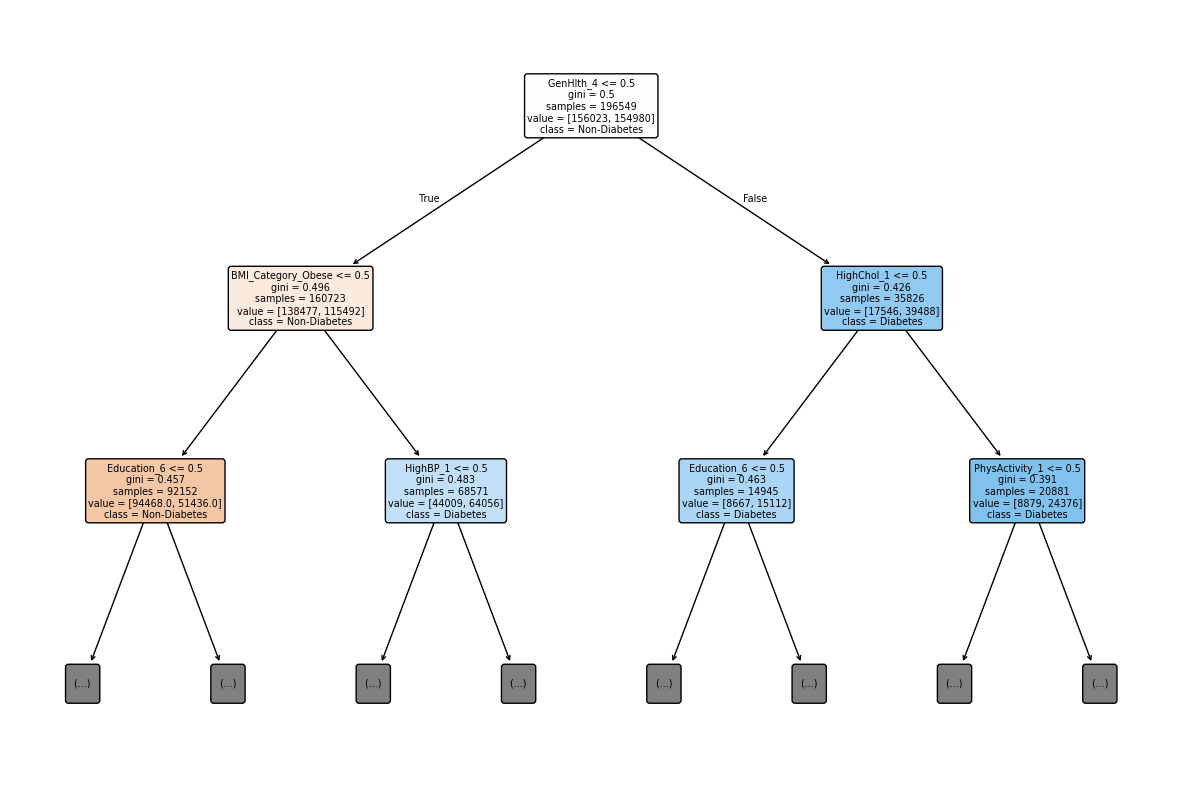

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree = rfc.estimators_[0]
plt.figure(figsize=(15,10))
#plot_tree(tree, filled=True, feature_names=X_test.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plot_tree(tree, filled=True, feature_names=X_test.columns, class_names=["Non-Diabetes", "Diabetes"], rounded=True, max_depth=2)
plt.show()

<center><h1><b>CONCLUSION</b></h1></center>

<h3>Of all models, the <b>Decision Tree Classifier</b> model, trained and tested on the binary classification problem targeting diabetes detection, achieved an exceptional accuracy of around <b>94 %</b> without tuning.</h3><br>
<h3>Conclusions based on <b>feature importances</b> and the <b>tree plot</b></h3> 
<h4>the key factors associated with diabetes are:</h4>
<ul>
    <li><b>High Cholesterol</b> (HighChol > 0.5 - tree & feature impotance)</li>
    <li><b>High Blood Pressure</b> (HighBP > 0.5 - tree & feature impotance)</li>
    <li><b>Lower Physical Activity</b> (PhysActivity <= 0.5 - tree & feature impotance)</li>
    <li><b>Higher BMI</b> (BMI_Category_Obese > 0.5 - tree & feature impotance)</li>
    <li><b>Smoking</b> (0.036832 - feature impotance)</li>
</ul>
<h4>Demographic factors like <b>gender</b> and <b>age</b> and socioeconomic factors like <b>income</b> and <b>education levels</b> also contribute to potential diabetes risk.
</h4>
<br>
<h4>Conclusions align well with the observations made during data exploration.</h4>